# Example Flattening the Curve

The top example shows no suppression wihle the bottom shows a 50% suppression policy.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


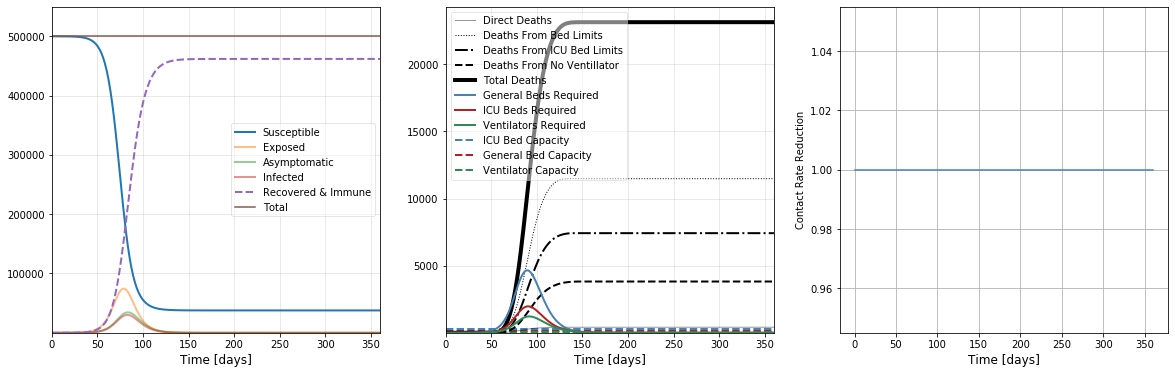

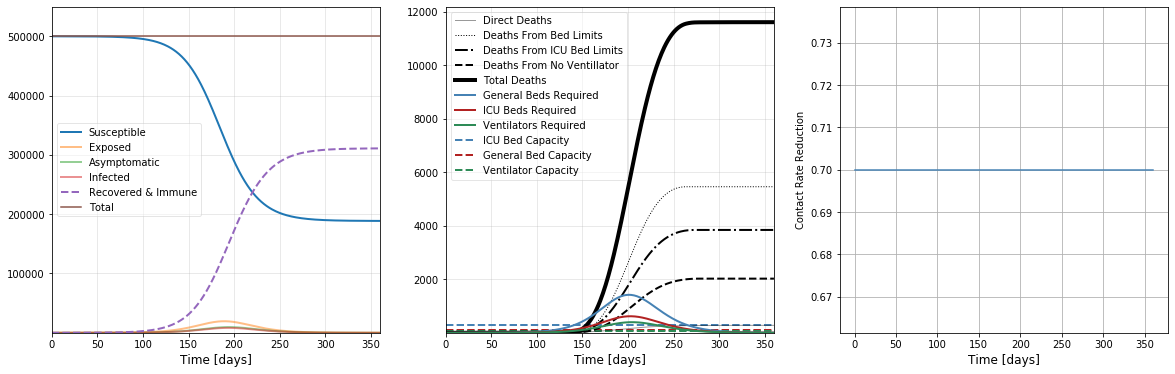

In [26]:
%load_ext autoreload
%autoreload 2
import sys

import numpy as np
from pyseir.models.seir_model import SEIRModel
from pyseir.models.suppression_policies import generate_triggered_suppression_model
import matplotlib.pyplot as plt

n_days = 360
t_list = np.linspace(0, n_days, n_days)
suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=1, open_days=0, reduction=1)


model = SEIRModel(
    N=500000,
    R0=3,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')


suppression_policy = generate_triggered_suppression_model(t_list=t_list, lockdown_days=2000, open_days=0, reduction=.7)
model = SEIRModel(
    N=500000,
    A_initial=5,
    I_initial=5,
    t_list=t_list,
    suppression_policy=suppression_policy)

model.run()
model.plot_results(y_scale='linear')

# Optimal Parametric Policies
Optimize a peicewise discontinuous set of suppression models (between bounds) to minimize the total death count.

In [9]:
from pyseir.models import suppression_policies
from pyseir.optimization import PolicyOptimizer

N_piecewise_segments = 10

# Start with an initial policy of 50% suppression indefinitely.
# The 0.5 first parameter for this policy is how to increase the intervals as a power-law between the first segments.
x0 = [.5] * (N_piecewise_segments)

# Min/max levels of suppression acheivable. 0.2 is extreme isolation, 2 = chicken pox parties.
min_suppression_level, max_suppression_level = 2, 0.6
# optimization_bounds = [(1, 1)] + [(max_suppression_level, min_suppression_level)] * N_piecewise_segments
optimization_bounds = None

optimizer = PolicyOptimizer(
    seir_model_class=SEIRModel,
    seir_model_args=dict(
         N=1000000,
         A_initial=50,
         I_initial=500,
         t_list=np.linspace(0, 1440, 720)
    ),
    parametric_policy=suppression_policies.fourier_parametric_policy,
    parametric_policy_kwargs=dict(
        suppression_bounds=(0.8, 1.5),
    ),
    x0=x0,
    optimization_bounds=optimization_bounds
)

optimizer.run(tol=0.01)


(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)
18418.17775115846
(0.8, 1.5)


      fun: 18418.17775115846
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

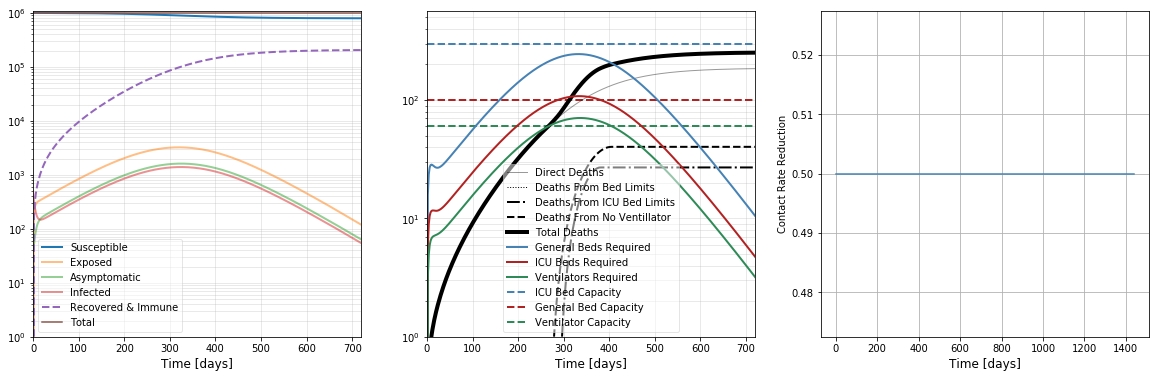

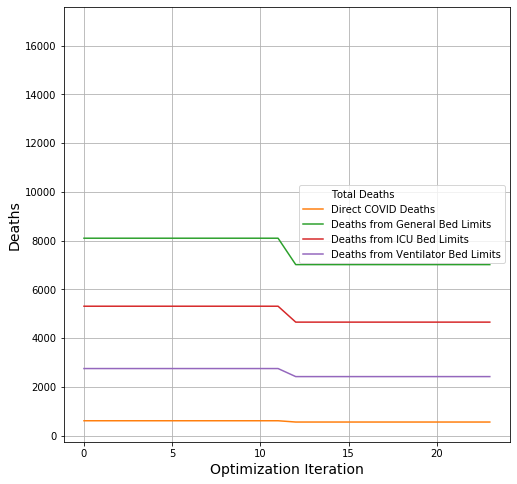

In [8]:
optimizer.plot_optimal_model(xlim=(0, 720))
optimizer.plot_loss()

In [22]:
from pyseir.models import suppression_policies
from pyseir.optimization import PolicyOptimizer

N_piecewise_segments = 10

# Start with an initial policy of 50% suppression indefinitely.
# The 0.5 first parameter for this policy is how to increase the intervals as a power-law between the first segments.
x0 = [.5] + [.5] * N_piecewise_segments

# Min/max levels of suppression acheivable. 0.2 is extreme isolation, 2 = chicken pox parties.
min_suppression_level, max_suppression_level = 2, 0.6
# optimization_bounds = [(1, 1)] + [(max_suppression_level, min_suppression_level)] * N_piecewise_segments
optimization_bounds = None

optimizer = PolicyOptimizer(
    seir_model_class=SEIRModel,
    seir_model_args=dict(
         N=1000000,
         A_initial=50,
         I_initial=50,
         t_list=np.linspace(0, 1440, 720)
    ),
    parametric_policy=suppression_policies.piecewise_parametric_policy,
    parametric_policy_kwargs=dict(),
    x0=x0,
    optimization_bounds=[(0, 3)] + [(max_suppression_level, min_suppression_level)] * N_piecewise_segments

)

fit_results = optimizer.run(
    minimize_kwargs=dict(
        method='L-BFGS-B',
        tol=1e-3,
    )
)

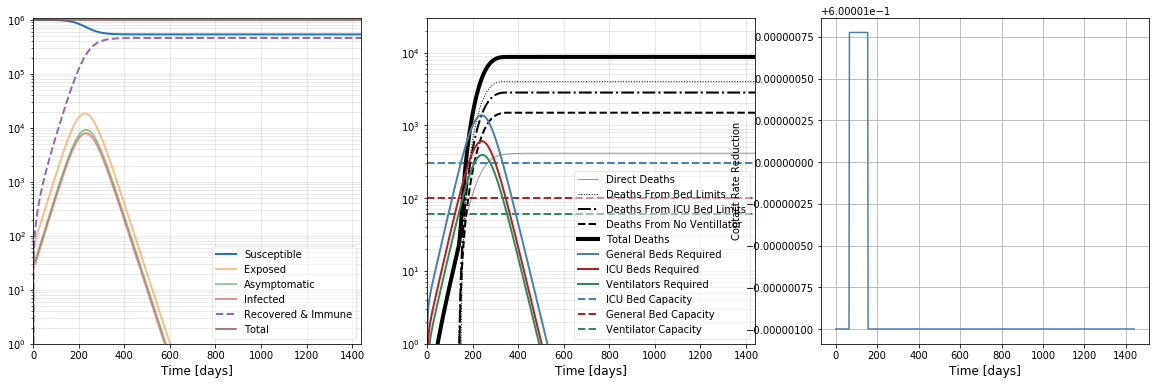

In [24]:
optimizer.plot_optimal_model()